# Python - Final Assignment - Index Portfolio

In [2]:
import pandas as pd        # For data manipulation and analysis
import numpy as np         # For numerical computations
import matplotlib.pyplot as plt  # For creating visualizations
from datetime import datetime    # For handling date and time operations
import seaborn as sns      # For advanced and aesthetic visualizations

In [3]:
# Load the dataset with proper delimiter, decimal separator, and date parsing
funds = pd.read_csv('IndexInfo.csv', delimiter=';', index_col=0, parse_dates=[0], dayfirst=True, decimal=',')

# Drop rows with NaN values
funds_cleaned = funds.dropna()

# Display the first few rows of the cleaned data
print(funds_cleaned.head())

            SMCI,OQ  ELF,N  ONTO,N   FN,N  SSD,N  FIX,N  RMBS,OQ  LNW,OQ  \
2020-01-14    27.00  15.12   38.08  66.03  82.52  48.81    14.27   27.80   
2020-01-15    27.70  14.72   37.93  66.35  82.71  48.79    14.02   27.51   
2020-01-16    28.61  14.75   40.13  64.51  84.01  49.71    14.33   27.90   
2020-01-17    28.67  15.14   40.15  66.66  83.38  49.46    14.37   27.15   
2020-01-21    28.59  15.86   39.50  66.15  83.41  49.62    14.29   25.51   

            CYTK,OQ  BRBR,N  ...  TNET,N  BOX,N  SKY,N  AEO,N  AMKR,OQ  \
2020-01-14    12.69   21.65  ...   56.47  16.22  36.16  14.73    12.92   
2020-01-15    12.69   22.45  ...   57.38  16.08  35.85  14.27    12.98   
2020-01-16    12.61   22.45  ...   58.05  16.60  35.47  14.71    13.23   
2020-01-17    12.14   22.56  ...   58.84  16.27  34.89  14.70    13.20   
2020-01-21    12.14   22.95  ...   57.42  16.27  34.70  14.39    13.10   

            PCH,OQ  LANC,OQ   GPI,N  MOD,N  BLKB,OQ  
2020-01-14   40.10   161.68  100.35   7.40  

# Equally Weighted Portolio with Performance Analysis

In [7]:

# 1. Calculate log returns for all assets
log_returns = np.log(funds_cleaned / funds_cleaned.shift(1))
log_returns = log_returns.dropna()  # Remove the first row with NaN

# 2. Construct an equally weighted portfolio across all columns
num_assets = log_returns.shape[1]
weights = np.ones(num_assets) / num_assets  # Equal weights for all assets

# Compute the daily portfolio log returns (assuming continuous rebalancing)
portfolio_log_returns = log_returns.dot(weights)

# 3. Calculate cumulative portfolio returns from log returns
# For continuously compounded returns, cumulative return = exp(cumsum(log_returns)) - 1
cumulative_returns = np.exp(portfolio_log_returns.cumsum()) - 1

# 4. Compute performance metrics
trading_days = 252  # typical number of trading days per year

# Annualized return (using the mean of daily log returns)
annualized_return = portfolio_log_returns.mean() * trading_days

# Annualized volatility (standard deviation scaled by sqrt of trading days)
annualized_vol = portfolio_log_returns.std() * np.sqrt(trading_days)

# Sharpe Ratio calculation (using a risk-free rate, e.g., 1% per year)
risk_free_rate = 0.03
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_vol if annualized_vol != 0 else np.nan

# 5. Display results
print("Portfolio Log Returns (first 5 rows):")
print(portfolio_log_returns.head())

print("\nPerformance Metrics:")
print("Annualized Return: {:.2%}".format(annualized_return))
print("Annualized Volatility: {:.2%}".format(annualized_vol))
print("Sharpe Ratio: {:.2f}".format(sharpe_ratio))


Portfolio Log Returns (first 5 rows):
2020-01-15    0.001754
2020-01-16    0.010785
2020-01-17   -0.005617
2020-01-21   -0.011180
2020-01-22   -0.000284
dtype: float64

Performance Metrics:
Annualized Return: 16.45%
Annualized Volatility: 32.54%
Sharpe Ratio: 0.41


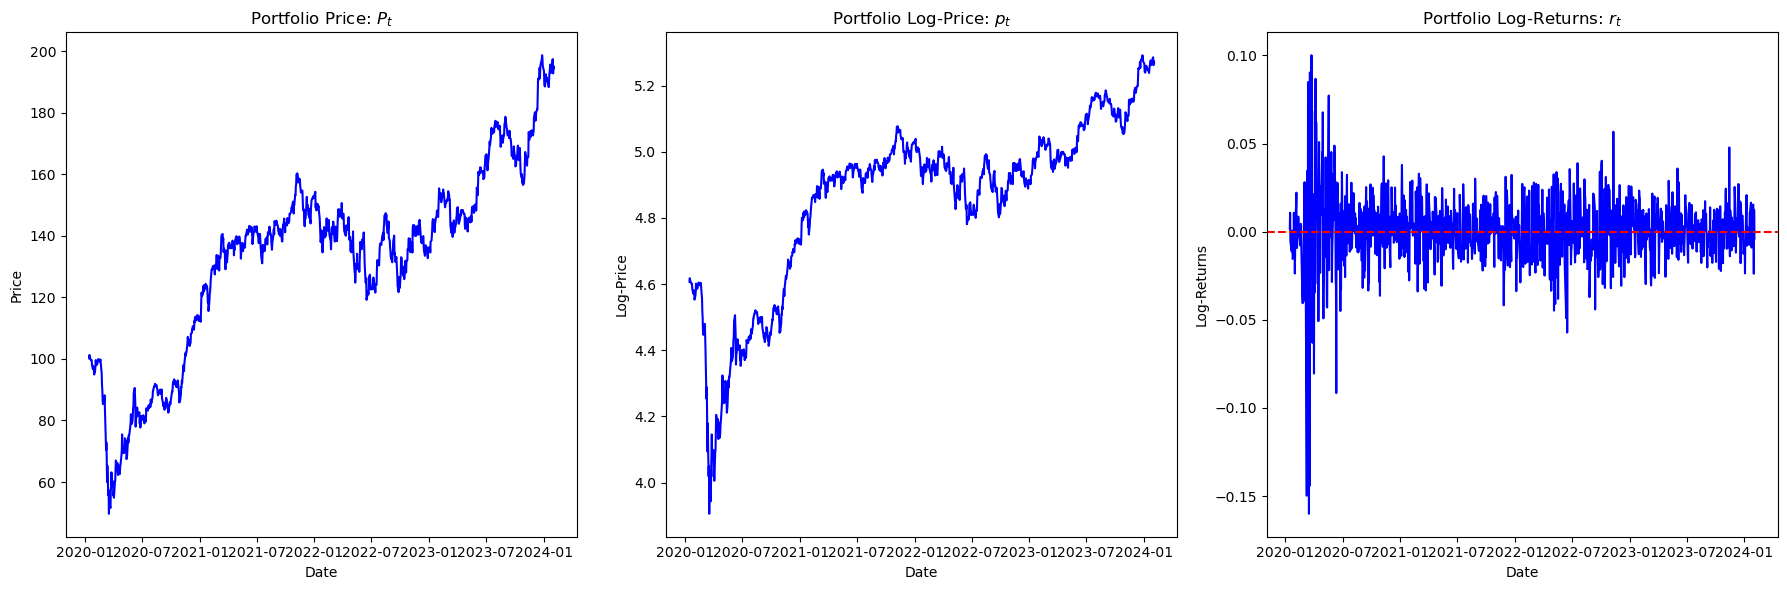

In [9]:
# -> Rebuild a "portfolio price" from log returns
#    For example, we set an initial (fictitious) price to 100
initial_price = 100
portfolio_price = initial_price * np.exp(portfolio_log_returns.cumsum())

# 2. Calculate the log-price of the portfolio
portfolio_log_price = np.log(portfolio_price)

# 3. Create a figure with three subplots: price, log-price, and log-returns
plt.figure(figsize=(18, 6))

# First subplot: portfolio price evolution
plt.subplot(1, 3, 1)
plt.plot(portfolio_price.index, portfolio_price, color='blue')
plt.title("Portfolio Price: $P_t$")
plt.xlabel("Date")
plt.ylabel("Price")

# Second subplot: portfolio log-price evolution
plt.subplot(1, 3, 2)
plt.plot(portfolio_log_price.index, portfolio_log_price, color='blue')
plt.title("Portfolio Log-Price: $p_t$")
plt.xlabel("Date")
plt.ylabel("Log-Price")

# Third subplot: daily log-returns
plt.subplot(1, 3, 3)
plt.plot(portfolio_log_returns.index, portfolio_log_returns, color='blue')
plt.axhline(0, color='red', linestyle='--')  # Horizontal line at zero
plt.title("Portfolio Log-Returns: $r_t$")
plt.xlabel("Date")
plt.ylabel("Log-Returns")

plt.tight_layout()
plt.show()


In [10]:
from scipy.stats import skew, kurtosis, jarque_bera
import statsmodels.api as sm

# 1. Define the function for descriptive statistics
def multi_fun(x):
    stat_tab = {
        'Mean': round(np.mean(x) * 100, 3),
        'St.Deviation': round(np.std(x) * 100, 3),
        'Skewness': round(skew(x), 3),
        'Kurtosis': round(kurtosis(x), 3),
        'Excess.Kurtosis': round(kurtosis(x) - 3, 3),
        'Min': round(np.min(x) * 100, 3),
        'Quant5': round(np.quantile(x, 0.05) * 100, 3),
        'Quant25': round(np.quantile(x, 0.25) * 100, 3),
        'Median': round(np.quantile(x, 0.50) * 100, 3),
        'Quant75': round(np.quantile(x, 0.75) * 100, 3),
        'Quant95': round(np.quantile(x, 0.95) * 100, 3),
        'Max': round(np.max(x) * 100, 3),
        'JB.stat': round(jarque_bera(x)[0], 3),
        'JB.pval': round(jarque_bera(x)[1], 3),
        'LB.lag1.stat': round(sm.stats.diagnostic.acorr_ljungbox(x, lags=1, boxpierce=False)['lb_stat'][1], 3),
        'LB.lag1.pval': round(sm.stats.diagnostic.acorr_ljungbox(x, lags=1, boxpierce=False)['lb_pvalue'][1], 3),
        'BP.lag1.stat': round(sm.stats.diagnostic.acorr_ljungbox(x, lags=1, boxpierce=True)['bp_stat'][1], 3),
        'BP.lag1.pval': round(sm.stats.diagnostic.acorr_ljungbox(x, lags=1, boxpierce=True)['bp_pvalue'][1], 3),
        'N.obs': round(len(x))
    }
    return stat_tab

# 2. Apply the function to your portfolio's log returns (assuming 'portfolio_log_returns' is a Pandas Series)
stats_portfolio = multi_fun(portfolio_log_returns)

# 3. Convert the dictionary to a DataFrame for a nicer display
stats_portfolio_df = pd.DataFrame(stats_portfolio, index=[0]).T
stats_portfolio_df.columns = ['Equally Weighted Portfolio']
print(stats_portfolio_df)


                 Equally Weighted Portfolio
Mean                                  0.065
St.Deviation                          2.049
Skewness                             -1.193
Kurtosis                             11.541
Excess.Kurtosis                       8.541
Min                                 -16.006
Quant5                               -2.843
Quant25                              -0.946
Median                                0.119
Quant75                               1.151
Quant95                               2.751
Max                                  10.011
JB.stat                            5891.500
JB.pval                               0.000
LB.lag1.stat                         11.759
LB.lag1.pval                          0.001
BP.lag1.stat                         11.724
BP.lag1.pval                          0.001
N.obs                              1018.000


# Let's do a GARCH Model (1,1) to predict the volatility of the Portfolio

C:\Users\Adrien\anaconda3\envs\PyFi309\lib\site-packages\statsmodels\graphics\gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


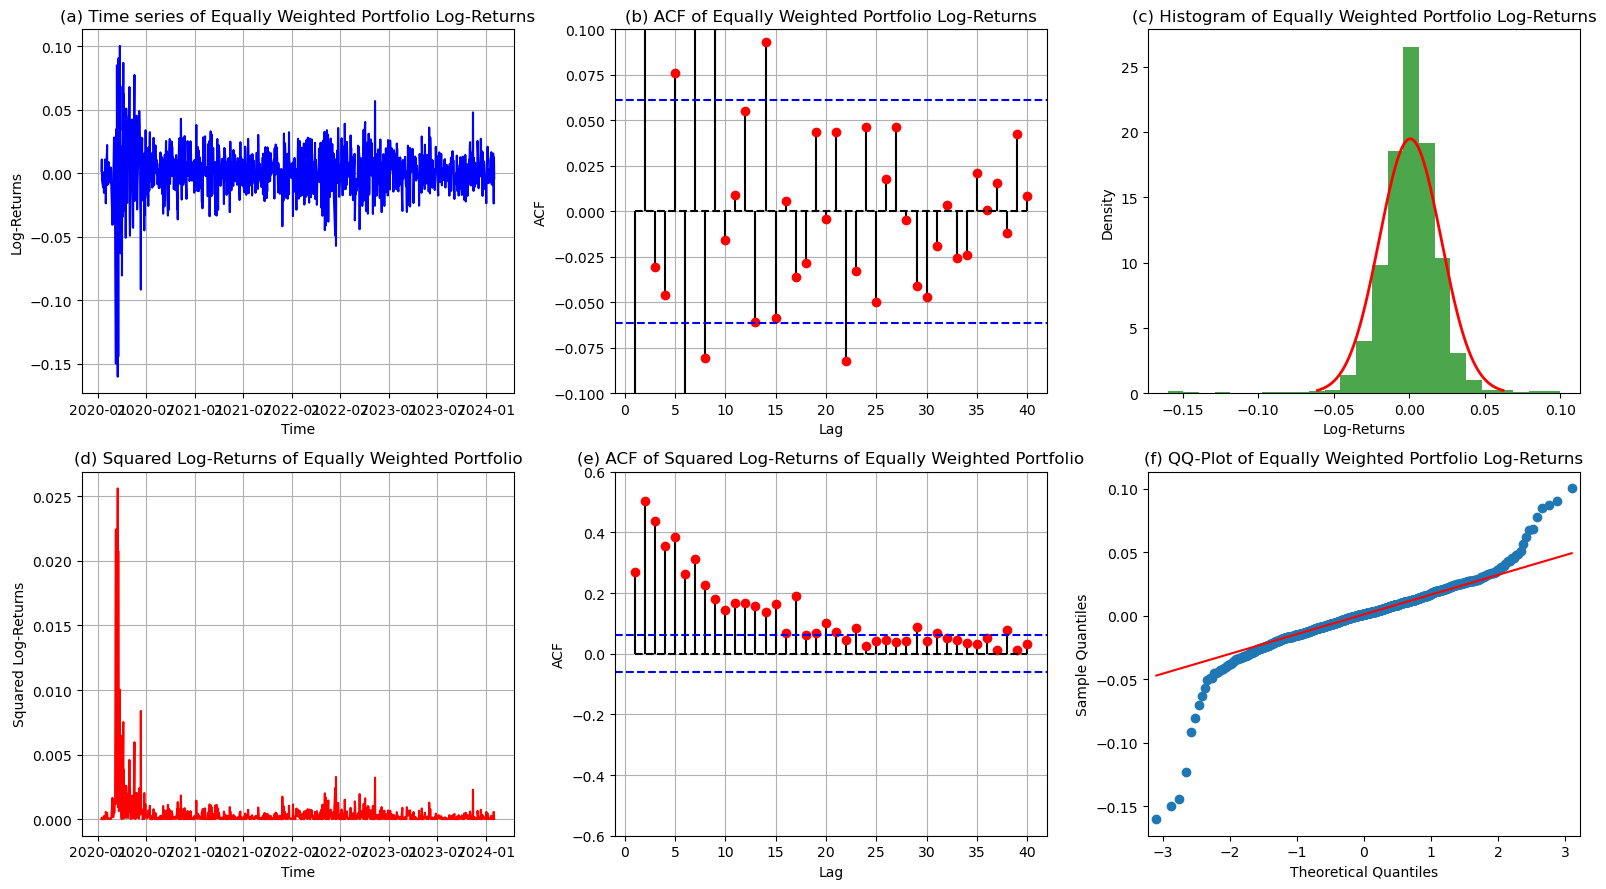

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm

# Assuming portfolio_log_returns is defined as a Pandas Series
x = portfolio_log_returns
T = len(x)

# Define a 2x3 grid for the 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(16, 9))

# Plot 1: Time series of portfolio log returns
axs[0, 0].plot(x, color='blue')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Log-Returns')
axs[0, 0].set_title('(a) Time series of Equally Weighted Portfolio Log-Returns')
axs[0, 0].grid(True)

# Plot 2: ACF of portfolio log returns
x_acf = sm.tsa.acf(x, nlags=40)[1:]
lags = range(1, 41)
axs[0, 1].stem(lags, x_acf, markerfmt='ro', linefmt='k-', basefmt='k--')
# Plot confidence intervals at ±1.96/sqrt(T)
axs[0, 1].axhline(y=1.96 / np.sqrt(T), color='blue', linestyle='--', label='Confidence Interval')
axs[0, 1].axhline(y=-1.96 / np.sqrt(T), color='blue', linestyle='--', label='Confidence Interval')
axs[0, 1].set_ylim(-0.1, 0.1)
axs[0, 1].set_xlabel('Lag')
axs[0, 1].set_ylabel('ACF')
axs[0, 1].set_title('(b) ACF of Equally Weighted Portfolio Log-Returns')
axs[0, 1].grid(True)

# Plot 3: Histogram with overlaid normal distribution
mu = np.mean(x)
sd_sample = np.sqrt(np.var(x))
vv = np.linspace(mu - 3 * sd_sample, mu + 3 * sd_sample, 200)
axs[0, 2].hist(x, bins=25, density=True, color='green', alpha=0.7)
axs[0, 2].plot(vv, norm.pdf(vv, mu, sd_sample), color='red', linewidth=2)
axs[0, 2].set_title('(c) Histogram of Equally Weighted Portfolio Log-Returns')
axs[0, 2].set_xlabel('Log-Returns')
axs[0, 2].set_ylabel('Density')

# Plot 4: Time series of squared portfolio log returns
axs[1, 0].plot(x**2, color='red')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Squared Log-Returns')
axs[1, 0].set_title('(d) Squared Log-Returns of Equally Weighted Portfolio')
axs[1, 0].grid(True)

# Plot 5: ACF of squared portfolio log returns
x_acf2 = sm.tsa.acf(x**2, nlags=40)[1:]
axs[1, 1].stem(lags, x_acf2, markerfmt='ro', linefmt='k-', basefmt='k--')
axs[1, 1].axhline(y=1.96 / np.sqrt(T), color='blue', linestyle='--', label='Confidence Interval')
axs[1, 1].axhline(y=-1.96 / np.sqrt(T), color='blue', linestyle='--', label='Confidence Interval')
axs[1, 1].set_ylim(-0.6, 0.6)
axs[1, 1].set_xlabel('Lag')
axs[1, 1].set_ylabel('ACF')
axs[1, 1].set_title('(e) ACF of Squared Log-Returns of Equally Weighted Portfolio')
axs[1, 1].grid(True)

# Plot 6: QQ-plot of portfolio log returns
sm.qqplot(x, line='q', ax=axs[1, 2], color='red')
axs[1, 2].set_title('(f) QQ-Plot of Equally Weighted Portfolio Log-Returns')

plt.tight_layout()
plt.show()


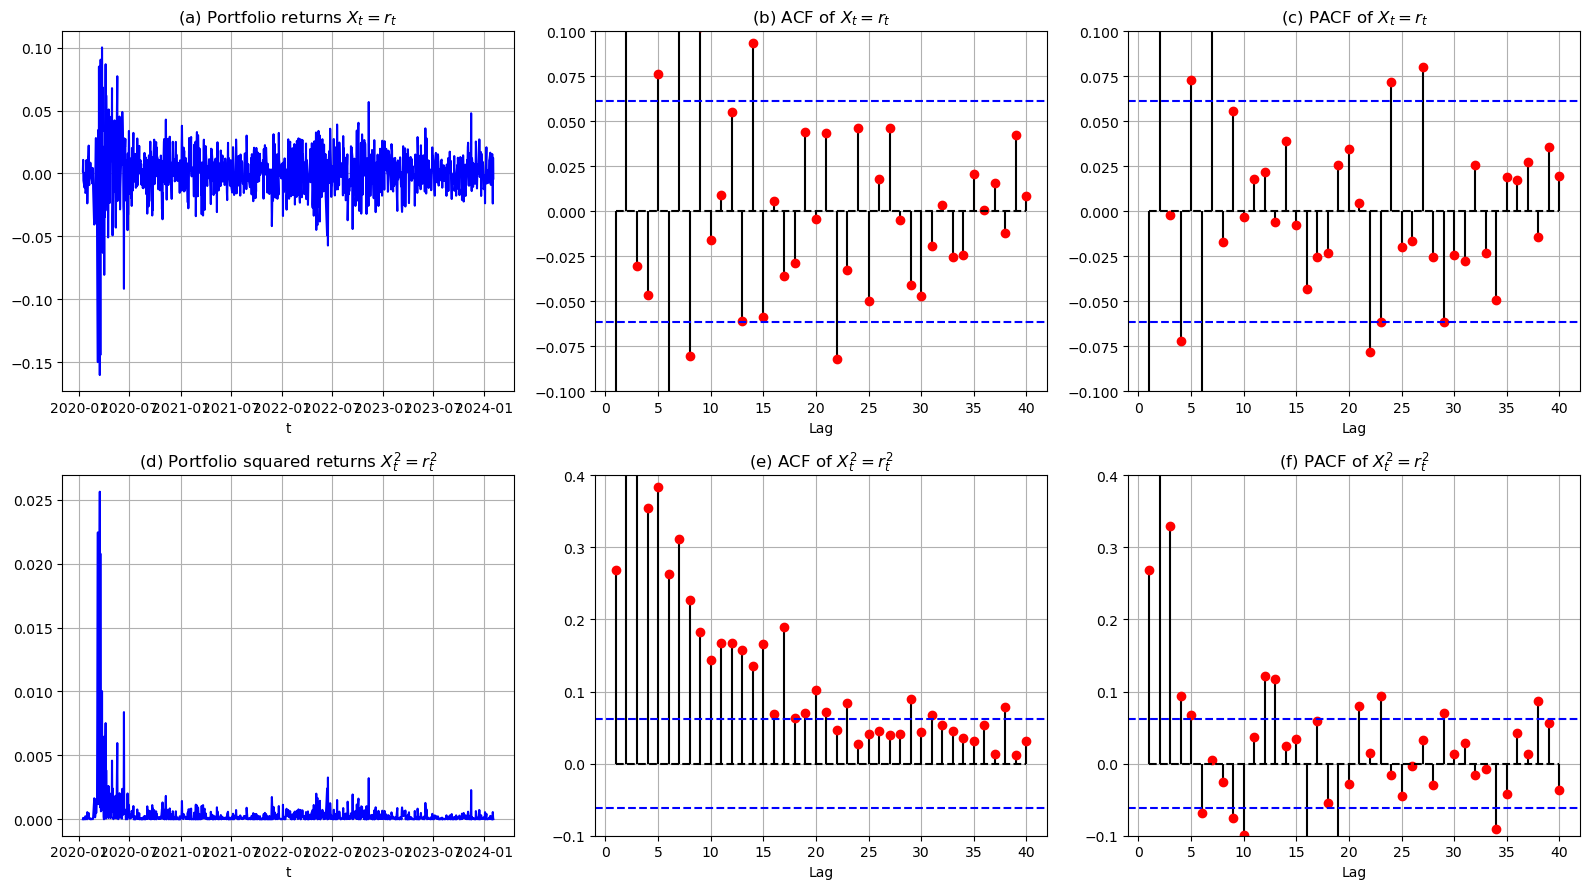

In [13]:
# Assuming x is defined as your equally weighted portfolio log returns
x = portfolio_log_returns
T = len(x)

# Define a 2x3 grid for the 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(16, 9))

# PLOT 1: Time series of portfolio returns (daily)
axs[0, 0].plot(x, color='blue')
axs[0, 0].set_xlabel('t')
axs[0, 0].set_ylabel('')
axs[0, 0].set_title(r'(a) Portfolio returns $X_t = r_t$')
axs[0, 0].grid(True)

# PLOT 2: ACF of portfolio returns
x_acf = sm.tsa.acf(x, nlags=40)[1:]  # Exclude lag 0
lags = range(1, 41)
axs[0, 1].stem(lags, x_acf, markerfmt='ro', linefmt='k-', basefmt='k--')
axs[0, 1].axhline(y=1.96 / np.sqrt(T), color='blue', linestyle='--', label='C.I.')
axs[0, 1].axhline(y=-1.96 / np.sqrt(T), color='blue', linestyle='--', label='C.I.')
axs[0, 1].axis(ymin=-0.1, ymax=0.1)
axs[0, 1].set_xlabel('Lag')
axs[0, 1].set_ylabel('')
axs[0, 1].set_title(r'(b) ACF of $X_t = r_t$')
axs[0, 1].grid(True)

# PLOT 3: PACF of portfolio returns
x_pacf = sm.tsa.pacf(x, nlags=40)[1:]  # Exclude lag 0
axs[0, 2].stem(lags, x_pacf, markerfmt='ro', linefmt='k-', basefmt='k--')
axs[0, 2].axhline(y=1.96 / np.sqrt(T), color='blue', linestyle='--', label='C.I.')
axs[0, 2].axhline(y=-1.96 / np.sqrt(T), color='blue', linestyle='--', label='C.I.')
axs[0, 2].axis(ymin=-0.1, ymax=0.1)
axs[0, 2].set_xlabel('Lag')
axs[0, 2].set_ylabel('')
axs[0, 2].set_title(r'(c) PACF of $X_t = r_t$')
axs[0, 2].grid(True)

# PLOT 4: Time series of squared portfolio returns (daily)
axs[1, 0].plot(x**2, color='blue')
axs[1, 0].set_xlabel('t')
axs[1, 0].set_ylabel('')
axs[1, 0].set_title(r'(d) Portfolio squared returns $X_t^2 = r_t^2$')
axs[1, 0].grid(True)

# PLOT 5: ACF of squared portfolio returns
x_acf2 = sm.tsa.acf(x**2, nlags=40)[1:]  # Exclude lag 0
axs[1, 1].stem(lags, x_acf2, markerfmt='ro', linefmt='k-', basefmt='k--')
axs[1, 1].axhline(y=1.96 / np.sqrt(T), color='blue', linestyle='--', label='C.I.')
axs[1, 1].axhline(y=-1.96 / np.sqrt(T), color='blue', linestyle='--', label='C.I.')
axs[1, 1].axis(ymin=-0.1, ymax=0.4)
axs[1, 1].set_xlabel('Lag')
axs[1, 1].set_ylabel('')
axs[1, 1].set_title(r'(e) ACF of $X_t^2 = r_t^2$')
axs[1, 1].grid(True)

# PLOT 6: PACF of squared portfolio returns
x_pacf2 = sm.tsa.pacf(x**2, nlags=40)[1:]  # Exclude lag 0
axs[1, 2].stem(lags, x_pacf2, markerfmt='ro', linefmt='k-', basefmt='k--')
axs[1, 2].axhline(y=1.96 / np.sqrt(T), color='blue', linestyle='--', label='C.I.')
axs[1, 2].axhline(y=-1.96 / np.sqrt(T), color='blue', linestyle='--', label='C.I.')
axs[1, 2].axis(ymin=-0.1, ymax=0.4)
axs[1, 2].set_xlabel('Lag')
axs[1, 2].set_ylabel('')
axs[1, 2].set_title(r'(f) PACF of $X_t^2 = r_t^2$')
axs[1, 2].grid(True)

plt.tight_layout()
plt.show()


In [14]:
# ESTIMATION OR GARCH(1,1) model by maximum Likeihood

from arch import arch_model

# Model Specification
spec1 = arch_model(x, vol='Garch', mean='Zero',p=1, q=1) # mean= 'Zero' remove the cond mean model
# Model Estimation
fit1 = spec1.fit()
# Display Results
print(fit1)

Iteration:      1,   Func. Count:      5,   Neg. LLF: 532394818.30130154
Iteration:      2,   Func. Count:     11,   Neg. LLF: 258.58563594563276
Iteration:      3,   Func. Count:     18,   Neg. LLF: -1798.8342766901997
Iteration:      4,   Func. Count:     27,   Neg. LLF: -2206.8638479461542
Iteration:      5,   Func. Count:     33,   Neg. LLF: 258.58563594563276
Iteration:      6,   Func. Count:     39,   Neg. LLF: -2727.6774610114826
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2727.677461653402
            Iterations: 10
            Function evaluations: 39
            Gradient evaluations: 6
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                2727.68
Distribution:                  Nor

C:\Users\Adrien\anaconda3\envs\PyFi309\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004199. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<Figure size 1000x500 with 0 Axes>

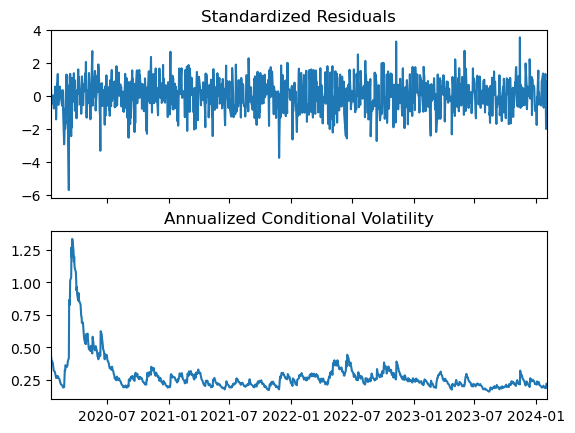

In [15]:
# here is how to extract the conditional volatility from the model
cv = fit1.conditional_volatility

# Plot estimated values of conditional volatility
plt.figure(figsize=(10, 5))
fit1.plot(annualize='D') # to annualize we have to indicate that data areon a daily basis
plt.show()

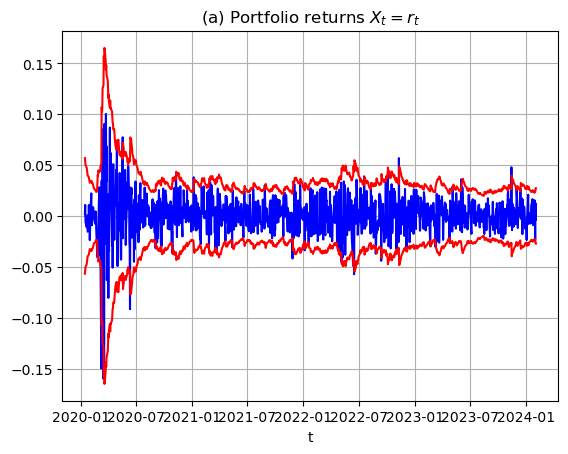

In [49]:
# PLOT 1: time series of Portfolio returns (daily) with cond volatility intervals
plt.plot(x, color='blue')
plt.xlabel('t')
plt.plot(1.96 * cv, color='red', label='Upper Volatility Bound')
plt.plot(-1.96 * cv, color='red', label='Lower Volatility Bound')
plt.ylabel('')
plt.title(r'(a) Portfolio returns $X_t = r_t$')
plt.grid(True)

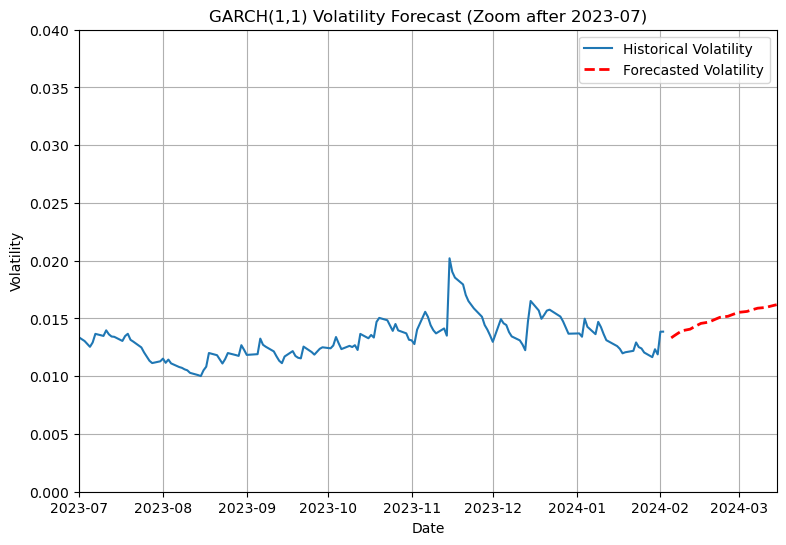

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set forecast horizon to 30 trading days
forecast_horizon = 30

# Generate the forecast from your fitted GARCH model (fit1)
forecast = fit1.forecast(horizon=forecast_horizon)

# Extract the forecasted variance for the last period and convert it to volatility
forecast_variance = forecast.variance.iloc[-1]
forecast_volatility = np.sqrt(forecast_variance.values)

# Retrieve the historical conditional volatility from the fitted model
historical_vol = fit1.conditional_volatility

# Create a new time index for the forecasted periods.
# This assumes that your historical index is a DatetimeIndex.
last_date = historical_vol.index[-1]
forecast_index = pd.date_range(start=last_date, periods=forecast_horizon+1, freq='B')[1:]

# Plot historical volatility and forecasted volatility (zoomed in)
plt.figure(figsize=(9, 6))
plt.plot(historical_vol.index, historical_vol, label='Historical Volatility')
plt.plot(forecast_index, forecast_volatility, color='red', linestyle='--',
         linewidth=2, markersize=3, label='Forecasted Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('GARCH(1,1) Volatility Forecast (Zoom after 2023-07)')
plt.xlim(pd.to_datetime("2023-07-01"), forecast_index[-1])
plt.ylim(0, 0.04)
plt.legend()
plt.grid(True)
plt.show()


# BONUS : Trying a Neuronal Network Model allocating future weights to beat the SR of an EWP

We constructed a multilayer perceptron (MLP) with the following layers:

Input Layer: Accepts vectors of dimension 20×N.
Dense Layer (128 neurons): Uses ReLU (Rectified Linear Unit) activation, which helps mitigate vanishing gradients and is well-suited for a wide range of tasks.
Dropout Layer (rate=0.2): Randomly zeroes out 20% of the neurons’ outputs during training to reduce overfitting and improve generalization.
Dense Layer (64 neurons): Another fully connected layer with ReLU activation.
Output Layer: Has  N linear units, producing the predicted returns for each of the N assets on the next day.

Loss Function: Mean Squared Error (MSE), which penalizes large deviations between predicted and actual returns.
Optimizer: Adam, a variant of stochastic gradient descent with adaptive learning rates and momentum-like terms (𝛽1, 𝛽2).
Batch Size: 32, controlling the number of samples per gradient update.
Epochs: 50, dictating how many passes over the training set are performed.
Validation Split: 10% of the training data is held out for on-the-fly validation to monitor overfitting.

During each epoch, the MLP updates its parameters (𝜃) via backpropagation, iterating through the training set in mini-batches.
The Dropout mechanism randomly disables connections within the hidden layers, reducing reliance on specific neurons and improving the model’s 
ability to generalize.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ----------------------------
# Step 1. Calculate log returns for all assets
# ----------------------------
log_returns = np.log(funds_cleaned / funds_cleaned.shift(1)).dropna()

# ----------------------------
# Step 2. Construct an equally weighted portfolio
# ----------------------------
num_assets = log_returns.shape[1]
weights = np.ones(num_assets) / num_assets  # Equal weights for all assets
portfolio_log_returns = log_returns.dot(weights)
cumulative_returns_ew = np.exp(portfolio_log_returns.cumsum()) - 1

# ----------------------------
# Step 3. Prepare data for the neural network
# ----------------------------
window_size = 20  # number of past days to use for prediction

X = []  # features
y = []  # targets (next-day returns for each asset)

# Loop over the data to create the training samples
for i in range(window_size, len(log_returns)):
    # Features: flatten the window of shape (window_size, num_assets)
    X.append(log_returns.iloc[i-window_size:i].values.flatten())
    # Target: returns for day i (vector of length num_assets)
    y.append(log_returns.iloc[i].values)
    
X = np.array(X)
y = np.array(y)

# Split data into training and testing sets (using time order; no random shuffle)
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Standardize features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ----------------------------
# Step 4. Build and train the neural network model
# ----------------------------
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(num_assets)  # output layer predicts next-day return for each asset
])

model.compile(optimizer='adam', loss='mse')
model.summary()

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

# ----------------------------
# Step 5. Use the model to forecast returns and create dynamic portfolio weights
# ----------------------------
predicted_returns = model.predict(X_test_scaled)

# Define a softmax function to convert predicted returns into portfolio weights.
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

# For each day in the test set, compute portfolio weights based on the predicted returns.
weights_pred = np.array([softmax(day_pred) for day_pred in predicted_returns])

# Now, simulate the portfolio's daily returns on the test set using the actual returns (y_test)
portfolio_returns_nn = np.array([np.dot(weights_pred[i], y_test[i]) for i in range(len(y_test))])

# ----------------------------
# Step 6. Compute performance metrics for the neural network–based portfolio
# ----------------------------
trading_days = 252  # typical number of trading days per year
cumulative_returns_nn = np.exp(np.cumsum(portfolio_returns_nn)) - 1

annualized_return_nn = np.mean(portfolio_returns_nn) * trading_days
annualized_vol_nn = np.std(portfolio_returns_nn) * np.sqrt(trading_days)
risk_free_rate = 0.03
sharpe_nn = (annualized_return_nn - risk_free_rate) / annualized_vol_nn if annualized_vol_nn != 0 else np.nan

print("Neural Network-Based Portfolio Performance (Test Set):")
print("Annualized Return: {:.2%}".format(annualized_return_nn))
print("Annualized Volatility: {:.2%}".format(annualized_vol_nn))
print("Sharpe Ratio: {:.2f}".format(sharpe_nn))

# ----------------------------
# Step 7. Forecast future returns and compute dynamic weights
# ----------------------------

# Initialize an empty list to store future weights
future_weights = []

# Number of days to forecast (e.g., 21 days for one month)
forecast_horizon = 21

# Loop over the forecast horizon
for i in range(forecast_horizon):
    # Retrain the model with the latest data
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)  # Set verbose=0 to avoid cluttering the output
    
    # Predict the next day's returns
    last_window = X_train[-1].reshape(1, -1)  # Use the most recent window of data
    last_window_scaled = scaler.transform(last_window)
    predicted_return = model.predict(last_window_scaled)
    
    # Compute portfolio weights using softmax
    weights = softmax(predicted_return.flatten())
    future_weights.append(weights)
    
    # Update the training data with the new observation (simulated here)
    # In a real-world scenario, you would append the actual new data
    new_observation = np.random.randn(num_assets)  # Replace this with actual new data
    X_train = np.vstack([X_train, last_window])
    y_train = np.vstack([y_train, new_observation])
    
    # Update the scaler with the new data
    X_train_scaled = scaler.fit_transform(X_train)

# Convert future_weights to a DataFrame for better visualization
future_weights_df = pd.DataFrame(future_weights, columns=funds_cleaned.columns)

# Display the future weights
print("\nFuture Portfolio Weights for a 20 days Forecast Horizon:")
print(future_weights_df)

C:\Users\Adrien\anaconda3\envs\PyFi309\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 128)                 │         299,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 117)                 │           7,605 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,509 (1.20 MB)

 Trainable params: 315,509 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3224 - val_loss: 0.0205
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0728 - val_loss: 0.0041
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0179 - val_loss: 0.0022
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0077 - val_loss: 0.0015
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0050 - val_loss: 0.0012
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0029 - val_loss: 0.0012
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0031 - val_loss: 0.0011
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0023 - val_loss: 0.0010
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0025 - val_loss: 0.0010
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0